Question 1:

Using the Python “sklearn” library, create and visualize the k-means clusters (with k=5) 
for the given heart disease dataset. For visualization, draw the scatter plot using the age 
and cholesterol features on each group of clusters. (2 marks) 

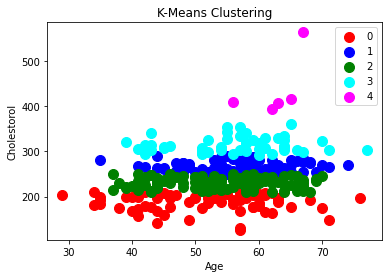

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

diabetes = pd.read_csv("Dataset heart-disease-dataset.csv")

df = pd.DataFrame(diabetes, columns=['age','chol'])
X = df.iloc[:,:].values

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='0')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='1')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='2')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label='3')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label='4')
plt.title("K-Means Clustering")
plt.xlabel('Age')
plt.ylabel('Cholestorol')
plt.legend()
plt.show()

Question 2:

Apply k-means clusters on the heart disease dataset with varying numbers of clusters 
from 1 to 10 and compute their corresponding Sum of squared Error (SSE) value. Plot the 
graph using Python “matplotlib” library and estimate the right “k” value.  
 
Hint:  
• The “elbow” in the plot of SSE vs the number of clusters can help to estimate “k” value
• Use python kmeans.inertia_ method to compute SSE 
• Use KneeLocator from kneed python library to find the elbow value

C:\Users\Ryan\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


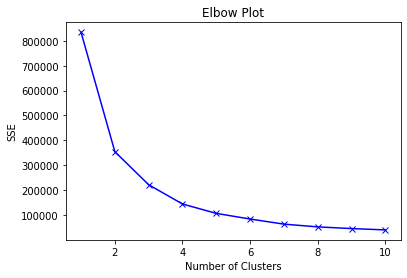

The elbow value for k is: 3


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from kneed import KneeLocator

SSE = []
num = range(1,11)

for k in num:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)
    SSE.append(kmeans.inertia_)
    
plt.plot(num, SSE, 'bx-')
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

kl = KneeLocator(num, SSE, curve="convex", direction="decreasing")
print("The elbow value for k is:", kl.elbow)

Question 3:

Create and visualize the k-means clustering with the “k” value obtained in Q2. The 
clustering algorithm ultimately groups similar patients by matching its features. Thus, for 
the visualization, draw the scatter plot using the age and cholesterol features on each 
cluster group and label them as “Group-A”, “Group-B” etc.,   (2 marks)  

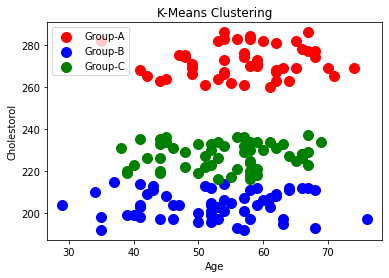

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label='Group-A')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label='Group-B')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label='Group-C')
plt.title("K-Means Clustering")
plt.xlabel('Age')
plt.ylabel('Cholestorol')
plt.legend()
plt.show()

Exercise 4:

Plot a dendrogram using Python scipy.cluster.hierarchy method. (1 marks) 

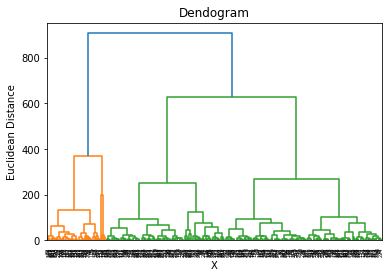

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendogram")
plt.xlabel("X")
plt.ylabel("Euclidean Distance")
plt.show()

Exercise 5:
    
Create the agglomerative clustering with the number of clusters is equal to the “k” value 
obtained in Question-2. Visualize the clusters similar to Question-2. (2 marks)

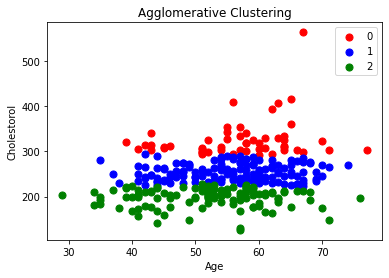

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering

SSE = []

hc = AgglomerativeClustering(n_clusters=kl.elbow, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=50, c='red', label='0')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=50, c='blue', label='1')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=50, c='green', label='2')
plt.title("Agglomerative Clustering")
plt.xlabel('Age')
plt.ylabel('Cholestorol')
plt.legend()
plt.show()

Exercise 6:

Compute silhouette score for both K-means and agglomerative clustering and tell us 
which clustering is better for the given dataset. (1 marks)  

In [6]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=kl.elbow, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)
kmeans_score = silhouette_score(X, kmeans.labels_, metric='euclidean')

hc = AgglomerativeClustering(n_clusters=kl.elbow, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)
hc_score = silhouette_score(X, hc.labels_, metric='euclidean')

print("Silhouette Score for K-means: %.5f" % kmeans_score)
print("Silhouette Score for agglomerative clustering: %.5f" % hc_score)
print("Therefore, K-means clustering is better for the given dataset")

Silhouette Score for K-means: 0.46850
Silhouette Score for agglomerative clustering: 0.46668
Therefore, K-means clustering is better for the given dataset
